# Subject dropping

- from df exclude all subs whose id is not in that tsv file
- perform t tests and check for differences
- plot what you found?

In [2]:
import numpy as np
import pandas as pd
import os
import glob
import json
from scipy.stats import ttest_ind
from scipy import stats
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
all_subj = '/home/gabridele/Desktop/preproc_psych/all_subj.tsv'
subj_keep_file = '/home/gabridele/Desktop/preproc_psych/subj_keep.tsv'
df_fd_file = '/home/gabridele/Desktop/preproc_psych/fd_values_scap-fMRI.xlsx'
sub_list2_file = '/home/gabridele/Desktop/preproc_psych/preproc_sub_list2.xlsx'
sub_list3_file = '/home/gabridele/Desktop/preproc_psych/preproc_sub_list3.xlsx'
labels = ['age','sex','site','mean_FD','edu_years','wais_mr','wais_lns','wais_voc']
groups = ['CTRL', 'SCZ', 'BPLR', 'ADHD']

Get demos and wais

In [57]:
participants_df = pd.read_csv(all_subj, delimiter='\t')
participants_file = "/home/gabridele/Desktop/psych_dataset/participants.tsv"

df_participants = pd.read_csv(participants_file, sep='\t', header=0)

# Read demographics file
demographics_file = '/home/gabridele/Desktop/psych_dataset/phenotype/demographics.tsv'
df_demo = pd.read_csv(demographics_file, sep='\t', header=0)

# Read WAIS file
wais_file = '/home/gabridele/Desktop/psych_dataset/phenotype/wais.tsv'
df_wais = pd.read_csv(wais_file, sep='\t', header=0)

#preallocate
age = np.zeros((len(df_participants.index)))
sex = age.copy()
site = age.copy()
edu_years = age.copy()
hand = age.copy()
wais_mr = age.copy() 
wais_lns = age.copy()
wais_voc = age.copy()

for subidx,subj in enumerate(df_participants["participant_id"]):
    idx = df_participants.participant_id==subj
    
    #age
    age[subidx] = np.int64(df_participants.age[idx].values[0])
    
    #sex: F=0, M=1
    _sex = df_participants.gender[idx].values
    if _sex == 'F':
        sex[subidx] = 0

    elif _sex == 'M':
        sex[subidx] = 1

    #site
    data = []
    file = f'/home/gabridele/Desktop/psych_dataset/{subj}/func/{subj}_task-scap_bold.json'
    try:
        with open(file) as json_data:
            data.append(json.load(json_data))

        if data[0]['SoftwareVersions'] == 'syngo MR B15':
            site[subidx] = 1
        elif data[0]['SoftwareVersions'] == 'syngo MR B17':
            site[subidx] = 0
    except FileNotFoundError:
        print(f'{subj} doesn\'t have scap task')
        

    # education (how many years of schooling complete?)
    edu_years[subidx] = np.int64(df_demo.school_yrs[idx].values[0])
    
    #
    #hand = 
    # wais
    wais_mr[subidx] = np.int64(df_wais.mr_totalraw[idx].values[0]) 
    wais_lns[subidx] = np.int64(df_wais.lns_totalraw[idx].values[0])
    wais_voc[subidx] = np.int64(df_wais.voc_totalraw[idx].values[0])
    
# put the data in the df
labels = ['age','sex','site','edu_years','wais_mr','wais_lns','wais_voc']
demo_data = np.vstack((age,sex,site,edu_years,wais_mr,wais_lns,wais_voc)).T
demo_df = pd.DataFrame(data=demo_data,index=participants_df.index,columns=labels)
df = pd.concat([participants_df,demo_df],axis=1)
print(df)
# print average demos
print(df['diagnosis'].value_counts())
print(df.groupby('diagnosis')[['age', 'sex', 'site']].mean())
groups = ['CTRL', 'SCHZ', 'BPLR', 'ADHD']
df.to_excel('/home/gabridele/Desktop/preproc_psych/preproc_sub_list3.xlsx', index=True)

sub-10193 doesn't have scap task
sub-10948 doesn't have scap task
sub-11082 doesn't have scap task
sub-70002 doesn't have scap task
        Sub_ID diagnosis   reason Hearne base Hearne site control Notes   age  \
0    sub-10159   CONTROL      NaN   sub-10159                 NaN   NaN  30.0   
1    sub-10171   CONTROL      NaN   sub-10171                 NaN   NaN  24.0   
2    sub-10189   CONTROL      NaN   sub-10189           sub-10189   NaN  49.0   
3    sub-10193   CONTROL  no scap         NaN                 NaN   NaN  40.0   
4    sub-10206   CONTROL      NaN         NaN                 NaN   NaN  21.0   
..         ...       ...      ...         ...                 ...   ...   ...   
267  sub-70079      ADHD      NaN   sub-70079           sub-70079   NaN  21.0   
268  sub-70080      ADHD      NaN   sub-70080           sub-70080   NaN  48.0   
269  sub-70081      ADHD      NaN   sub-70081           sub-70081   NaN  50.0   
270  sub-70083      ADHD      NaN   sub-70083           su

merge mean FD

In [58]:
participants_df = pd.read_csv(all_subj, delimiter='\t')

df_fd = pd.read_excel(df_fd_file)
sub_list3 = pd.read_excel(sub_list3_file)

df_fd.columns = ['Sub_ID'] + list(df_fd.columns[1:])

participants_dff = participants_df.merge(df_fd[['Sub_ID', 'mean']], on='Sub_ID', how='left')

participants_dff.rename(columns={'mean': 'mean_FD'}, inplace=True)

dff = participants_dff.merge(sub_list3[['Sub_ID', 'age','sex','site','edu_years','wais_mr','wais_lns','wais_voc']], on='Sub_ID', how='left')

dff.to_csv("/home/gabridele/Desktop/preproc_psych/subj_keeeeep.tsv", sep='\t', index=False)

In [59]:
print(dff)

        Sub_ID diagnosis   reason Hearne base Hearne site control Notes  \
0    sub-10159   CONTROL      NaN   sub-10159                 NaN   NaN   
1    sub-10171   CONTROL      NaN   sub-10171                 NaN   NaN   
2    sub-10189   CONTROL      NaN   sub-10189           sub-10189   NaN   
3    sub-10193   CONTROL  no scap         NaN                 NaN   NaN   
4    sub-10206   CONTROL      NaN         NaN                 NaN   NaN   
..         ...       ...      ...         ...                 ...   ...   
267  sub-70079      ADHD      NaN   sub-70079           sub-70079   NaN   
268  sub-70080      ADHD      NaN   sub-70080           sub-70080   NaN   
269  sub-70081      ADHD      NaN   sub-70081           sub-70081   NaN   
270  sub-70083      ADHD      NaN   sub-70083           sub-70083   NaN   
271  sub-70086      ADHD      NaN   sub-70086           sub-70086   NaN   

      mean_FD  age  sex  site  edu_years  wais_mr  wais_lns  wais_voc  
0    0.177901   30    0    

Exclude no dwi and no scap

In [60]:
dff = pd.read_csv("/home/gabridele/Desktop/preproc_psych/subj_keeeeep.tsv", sep='\t')
print(dff.columns)
a = (dff['reason'] != "ghost").values & (dff['reason'] != "no dwi").values & (dff['reason'] != "no scap").values & (dff['reason'] != "ghost, mean FD > 0.5").values & (dff['reason'] != "ghost, FD perc and mean > 0.5").values
b = ~a
exclude_subj = dff[a]

# Save the modified DataFrame to a new CSV file
exclude_subj.to_csv('/home/gabridele/Desktop/preproc_psych/subj_keep4.tsv', sep='\t', index=False)


Index(['Sub_ID', 'diagnosis', 'reason', 'Hearne base', 'Hearne site control',
       'Notes', 'mean_FD', 'age', 'sex', 'site', 'edu_years', 'wais_mr',
       'wais_lns', 'wais_voc'],
      dtype='object')


In [61]:
print(np.count_nonzero(b))
print(np.unique(b))
print(exclude_subj['diagnosis'].value_counts())

61
[False  True]
diagnosis
CONTROL    106
BIPOLAR     41
ADHD        35
SCZ         29
Name: count, dtype: int64


do the merging now. create yet another df starting from exclude_subj and merge based on sub_id the fd valuez

In [62]:


df_fd = pd.read_excel(df_fd_file)


df_fd.columns = ['Sub_ID'] + list(df_fd.columns[1:])
all_fd_values = exclude_subj.drop('mean_FD', axis=1)
all_fd_values = all_fd_values.merge(df_fd[['Sub_ID', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', '% > 0.2', '% > 0.5', 'Absolute > 0.2', 'Absolute > 0.5']], on='Sub_ID', how='left')

all_fd_values.rename(columns={'mean': 'mean_FD', 'std': 'std_FD', 'min': 'min_FD', 'max': 'max_FD', '% > 0.2': '% > 0.2_FD', '% > 0.5': '% > 0.5_FD', 'Absolute > 0.2': 'Absolute > 0.2_FD', 'Absolute > 0.5': 'Absolute > 0.5_FD'}, inplace=True)

all_fd_values.to_csv("/home/gabridele/Desktop/preproc_psych/all_fd_values.tsv", sep='\t', index=False)
print(all_fd_values.columns)

Index(['Sub_ID', 'diagnosis', 'reason', 'Hearne base', 'Hearne site control',
       'Notes', 'age', 'sex', 'site', 'edu_years', 'wais_mr', 'wais_lns',
       'wais_voc', 'mean_FD', 'std_FD', 'min_FD', '25%', '50%', '75%',
       'max_FD', '% > 0.2_FD', '% > 0.5_FD', 'Absolute > 0.2_FD',
       'Absolute > 0.5_FD'],
      dtype='object')


Plotting FD

In [9]:
!pwd


/home/gabridele/Documents/GitHub/thesis-work/demos_stats


/tmp/ipykernel_1497487/826530562.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y="mean_FD", data=df, palette="Set3", flierprops={'marker':'d'})


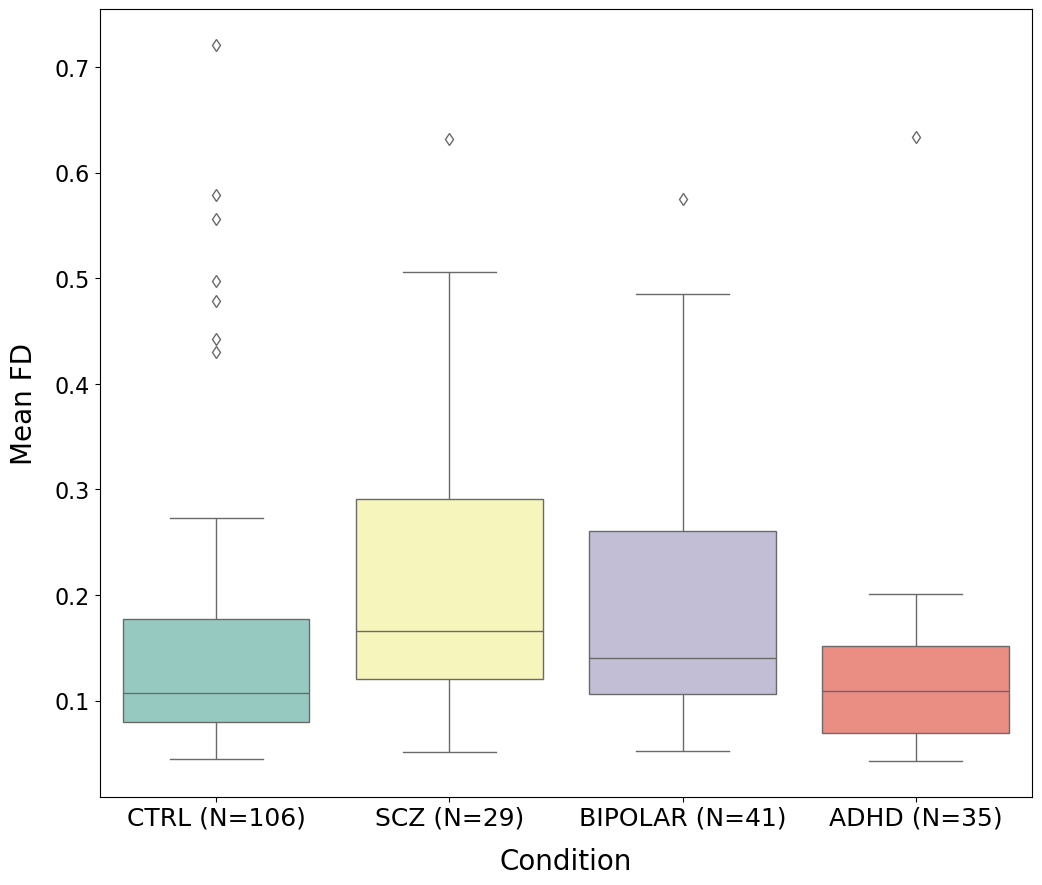

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the transposed Excel file into a DataFrame
df = pd.read_csv("/home/gabridele/Desktop/irbio_folder/spreading_dynamics_clinical/misc_to_cleanup/all_fd_values.tsv", sep='\t')

custom_labels = ["CTRL (N=106)", "SCZ (N=29)", "BIPOLAR (N=41)", "ADHD (N=35)"]

# Create a subplot layout with 3 rows and 2 columns
plt.figure(figsize=(20, 25))
'''
# Boxplot for percentage of values > 0.2 by diagnosis
plt.subplot(3, 2, 1)
sns.boxplot(x="diagnosis", y="% > 0.2_FD", data=df, palette="Set3")
plt.title("Percentage of Values > 0.2 by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("% Values > 0.2")
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)

# Boxplot for percentage of values > 0.5 by diagnosis
plt.subplot(3, 2, 2)
sns.boxplot(x="diagnosis", y="% > 0.5_FD", data=df, palette="Set3")
plt.title("Percentage of Values > 0.5 by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("% Values > 0.5")
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)

# Boxplot for absolute count of values > 0.2 by diagnosis
plt.subplot(3, 2, 3)
sns.boxplot(x="diagnosis", y="Absolute > 0.2_FD", data=df, palette="Set3")
plt.title("Absolute Count of Values > 0.2 by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Absolute Count > 0.2")
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)

# Boxplot for absolute count of values > 0.5 by diagnosis
plt.subplot(3, 2, 4)
sns.boxplot(x="diagnosis", y="Absolute > 0.5_FD", data=df, palette="Set3")
plt.title("Absolute Count of Values > 0.5 by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Absolute Count > 0.5")
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)
'''
# Boxplot for mean FD values by diagnosis
plt.subplot(3, 2, 5)
sns.boxplot(x="diagnosis", y="mean_FD", data=df, palette="Set3", flierprops={'marker':'d'})
plt.title("")
plt.xlabel("Condition", fontsize=20, labelpad=12)
plt.ylabel("Mean FD", fontsize=20, labelpad=12)
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, fontsize=18)  # Increase fontsize here
plt.yticks(fontsize=16)

#plt.suptitle("FD plots on SCAP task", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Last exclusion: beyond FD threshold

In [64]:
subj_df = pd.read_csv("/home/gabridele/Desktop/preproc_psych/subj_keep4.tsv", sep='\t')

a = (subj_df['reason'] != "mean FD > 0.5").values
b = ~a
exclude_final = subj_df[a]

# Save the modified DataFrame to a new CSV file
exclude_final.to_csv('/home/gabridele/Desktop/preproc_psych/subj_final.tsv', sep='\t', index=False)


In [65]:
print(np.count_nonzero(b))
print(np.unique(b))
print(exclude_final['diagnosis'].value_counts())
print(exclude_final)

7
[False  True]
diagnosis
CONTROL    103
BIPOLAR     40
ADHD        34
SCZ         27
Name: count, dtype: int64
        Sub_ID diagnosis reason Hearne base Hearne site control Notes  \
0    sub-10159   CONTROL    NaN   sub-10159                 NaN   NaN   
1    sub-10171   CONTROL    NaN   sub-10171                 NaN   NaN   
2    sub-10189   CONTROL    NaN   sub-10189           sub-10189   NaN   
3    sub-10206   CONTROL    NaN         NaN                 NaN   NaN   
4    sub-10217   CONTROL    NaN   sub-10217           sub-10217   NaN   
..         ...       ...    ...         ...                 ...   ...   
206  sub-70079      ADHD    NaN   sub-70079           sub-70079   NaN   
207  sub-70080      ADHD    NaN   sub-70080           sub-70080   NaN   
208  sub-70081      ADHD    NaN   sub-70081           sub-70081   NaN   
209  sub-70083      ADHD    NaN   sub-70083           sub-70083   NaN   
210  sub-70086      ADHD    NaN   sub-70086           sub-70086   NaN   

      mean_

Functions for stat testing

In [121]:
'''def all_groups_ttest(df, labels=['age','sex','site']):
    output = ""
    groups = df['diagnosis'].unique()
    for label in labels:
        output += f"t-test, Var={label}\n"
        for i, group1 in enumerate(groups):
            for group2 in groups[i+1:]:
                x = df[df['diagnosis'] == group1][label].values
                y = df[df['diagnosis'] == group2][label].values
                t, p = ttest_ind(x, y, equal_var=False)
                output += f"\tComparing {group1} vs {group2}:\n"
                output += f"\t  t = {t}\n"
                output += f"\t  p = {p}\n"
                
    output += "\nMeans:\n"
    output += str(df.groupby(['diagnosis'])[labels].mean()) + "\n"
    output += "\nStd:\n"
    output += str(df.groupby(['diagnosis'])[labels].std()) + "\n"

    return output

def all_groups_stats(df, labels=['age','sex','site']):
    output = ""
    groups = df['diagnosis'].unique()
    for label in labels:
        for i, group1 in enumerate(groups):
            for group2 in groups[i+1:]:
                if label == 'sex' or label == 'site':
                    output += f"Chi-square test, Var={label}\n"
                    new_df = df.loc[(df['diagnosis'] == group1) | (df['diagnosis'] == group2)]
                    expected, observed, stats = pg.chi2_independence(data=new_df, x=label, y='diagnosis')
                    output += f"\t Comparing {group1} vs {group2}:\n"
                    output += f"\t Chi2 = {np.round(stats.chi2[0], 3)}\n"
                    output += f"\t p = {np.round(stats.pval[0], 8)}\n"
                    output += f"\t Cramer's V = {np.round(stats.cramer[0], 8)}\n"
                else:
                    output += f"t-test, Var={label}\n"
                    x = df[df['diagnosis'] == group1][label].values
                    y = df[df['diagnosis'] == group2][label].values
                    t, p = ttest_ind(x, y, equal_var=False)
                    cohen_d = (abs(np.mean(x) - np.mean(y))) / np.sqrt(((len(x) - 1) * np.var(x, ddof=1) + (len(y) - 1) * np.var(y, ddof=1)) / (len(x) + len(y) - 2))                    
                    output += f"\t Comparing {group1} vs {group2}:\n"
                    output += f"\t  t = {t}\n"
                    output += f"\t  p = {p}\n"
                    output += f"\t  Cohen's d = {cohen_d:.8f}\n"

    output += "\nMeans:\n"
    output += str(df.groupby(['diagnosis'])[labels].mean()) + "\n"
    output += "\nStd:\n"
    output += str(df.groupby(['diagnosis'])[labels].std()) + "\n"

    return output'''
                

In [109]:
def all_groups_ttest(df, labels=['age','sex','site']):
    data = {
        "Comparison": [],
        "Var": [],
        "p-value": [],
        "Cohen's d": []
    }
    
    groups = df['diagnosis'].unique()
    for label in labels:
        for i, group1 in enumerate(groups):
            for group2 in groups[i+1:]:
                x = df[df['diagnosis'] == group1][label].values
                y = df[df['diagnosis'] == group2][label].values
                t, p = ttest_ind(x, y, equal_var=False)
                cohen_d = (abs(np.mean(x) - np.mean(y))) / np.sqrt(((len(x) - 1) * np.var(x, ddof=1) + (len(y) - 1) * np.var(y, ddof=1)) / (len(x) + len(y) - 2))
                data["Comparison"].append(f"{group1} vs {group2}")
                data["Var"].append(f"{label}")
                data["p-value"].append(round(p, 9))
                data["Cohen's d"].append(round(cohen_d, 3) if not np.isnan(cohen_d) else None)
    
    return pd.DataFrame(data)

def all_groups_stats(df, labels=['age','sex','site']):
    data = {
        "Comparison": [],
        "Var": [],
        "Test": [],
        "p-value": [],
        "Effect size": []
    }
    
    groups = df['diagnosis'].unique()
    for label in labels:
        for i, group1 in enumerate(groups):
            for group2 in groups[i+1:]:
                if label == 'sex' or label == 'site':
                    new_df = df.loc[(df['diagnosis'] == group1) | (df['diagnosis'] == group2)]
                    expected, observed, stats = pg.chi2_independence(data=new_df, x=label, y='diagnosis')
                    data["Comparison"].append(f"{group1} vs {group2}")
                    data["Var"].append(f"{label}")
                    data["Test"].append("X^2 test")
                    data["p-value"].append(round(stats.pval[0], 9))
                    data["Effect size"].append(round(stats.cramer[0], 3))
                else:
                    x = df[df['diagnosis'] == group1][label].values
                    y = df[df['diagnosis'] == group2][label].values
                    t, p = ttest_ind(x, y, equal_var=False)
                    cohen_d = (abs(np.mean(x) - np.mean(y))) / np.sqrt(((len(x) - 1) * np.var(x, ddof=1) + (len(y) - 1) * np.var(y, ddof=1)) / (len(x) + len(y) - 2))
                    data["Comparison"].append(f"{group1} vs {group2}")
                    data["Var"].append(f"{label}")
                    data["Test"].append("t-test")
                    data["p-value"].append(round(p, 9))
                    data["Effect size"].append(round(cohen_d, 3))
    
    return pd.DataFrame(data)

Stat testing

In [67]:
print(exclude_final.columns)

Index(['Sub_ID', 'diagnosis', 'reason', 'Hearne base', 'Hearne site control',
       'Notes', 'mean_FD', 'age', 'sex', 'site', 'edu_years', 'wais_mr',
       'wais_lns', 'wais_voc'],
      dtype='object')


In [116]:
#table 
#print(exclude_final['diagnosis'].value_counts())

#print(exclude_final.groupby(['diagnosis'])[labels].mean())
# Stats for second dropping: mean FD > 0.5
labels = ['age','sex','site','mean_FD','edu_years','wais_mr','wais_lns','wais_voc']
seconddropping__results = all_groups_stats(exclude_final, labels=labels)

#txt_file_path = '/home/gabridele/Desktop/preproc_psych/final_list_tests.txt'

# Save the output to a text file
#with open(txt_file_path, 'w') as txt_file:
#    txt_file.write(test_results)

In [117]:
print(seconddropping__results)

            Comparison        Var      Test       p-value  Effect size
0       CONTROL vs SCZ        age    t-test  1.833236e-02        0.544
1   CONTROL vs BIPOLAR        age    t-test  5.750581e-02        0.364
2      CONTROL vs ADHD        age    t-test  5.654218e-01        0.125
3       SCZ vs BIPOLAR        age    t-test  4.847393e-01        0.176
4          SCZ vs ADHD        age    t-test  1.474822e-01        0.373
5      BIPOLAR vs ADHD        age    t-test  3.656291e-01        0.215
6       CONTROL vs SCZ        sex  X^2 test  3.897502e-02        0.181
7   CONTROL vs BIPOLAR        sex  X^2 test  8.932496e-01        0.011
8      CONTROL vs ADHD        sex  X^2 test  8.817851e-01        0.013
9       SCZ vs BIPOLAR        sex  X^2 test  1.280309e-01        0.186
10         SCZ vs ADHD        sex  X^2 test  1.539763e-01        0.183
11     BIPOLAR vs ADHD        sex  X^2 test  8.448270e-01        0.023
12      CONTROL vs SCZ       site  X^2 test  1.302600e-05        0.382
13  CO

Exclude scap outliers based on accuracy

In [70]:
try_df = pd.read_csv('/home/gabridele/Desktop/preproc_psych/subj_final.tsv', sep='\t')

In [71]:
def load_scan_behaviour(subj_list,task_list,group_index):
    '''
    Loads in-scanner task behaviour. Currently only coded up for the 'SCAP' task.
    For in-depth explanation of the tasks and the conditions modelled in the GLM
    see the postFmriprepPipelines.py script which does the GLM.
    
    returns: 
    - accuracy, 
    - reaction_time, 
    - accuracy_all, 
    - reaction_time_all, 
    - labels
    '''
    BIDS_DIR = "/home/gabridele/Desktop/psych_dataset/"
    accuracy_all = {}
    reaction_time_all = {}
    accuracy = {}
    reaction_time = {}
    labels = {}

    for task in task_list:
        if task=='scap':
            # 12 conditions - each cognitive load and each delay
            task_label = ['load1-delay1.5','load1-delay3','load1-delay4.5',
                     'load3-delay1.5','load3-delay3','load3-delay4.5',
                     'load5-delay1.5','load5-delay3','load5-delay4.5',
                     'load7-delay1.5','load7-delay3','load7-delay4.5']

            raw_acc = np.zeros((4,12,len(subj_list))) # trial x condition x subject
            raw_rt = raw_acc.copy()

            for i,subj in enumerate(subj_list):
                # get task information
                df_task = pd.read_csv(BIDS_DIR + str(subj) + '/func/' + str(subj) + '_task-' + task + '_events.tsv', sep='\t', header=0)

                for trial in range(1,13):
                    #accuracy
                    acc = df_task['ResponseAccuracy'].values[df_task['trial_type']==trial]=='CORRECT'
                    acc = acc.astype(int)
                    raw_acc[:,trial-1,i] = acc
                    #rt
                    rt = df_task['ReactionTime'].values[df_task['trial_type']==trial]
                    raw_rt[:,trial-1,i] = rt

        # put in a task list
        accuracy_all[task] = raw_acc
        reaction_time_all[task] = raw_rt
        labels[task] = task_label

        # put in a list with groups
        accuracy[task] = {}
        accuracy[task]['CONTROL'] = raw_acc[:,:,group_index=='CONTROL']
        accuracy[task]['SCZ'] = raw_acc[:,:,group_index=='SCZ']
        accuracy[task]['BIPOLAR'] = raw_acc[:,:,group_index=='BIPOLAR']
        accuracy[task]['ADHD'] = raw_acc[:,:,group_index=='ADHD']

        reaction_time[task] = {}
        reaction_time[task]['CONTROL'] = raw_rt[:,:,group_index=='CONTROL']
        reaction_time[task]['SCZ'] = raw_rt[:,:,group_index=='SCZ']
        reaction_time[task]['BIPOLAR'] = raw_rt[:,:,group_index=='BIPOLAR']
        reaction_time[task]['ADHD'] = raw_rt[:,:,group_index=='ADHD']
    return accuracy, reaction_time, accuracy_all, reaction_time_all, labels

Poor subjs: 52    sub-10680
65    sub-10788
Name: Sub_ID, dtype: object
Odd HC participant scored: [25.   31.25] %
Odd HC participant scored: [-5.05063257 -4.52533959] (zscore)


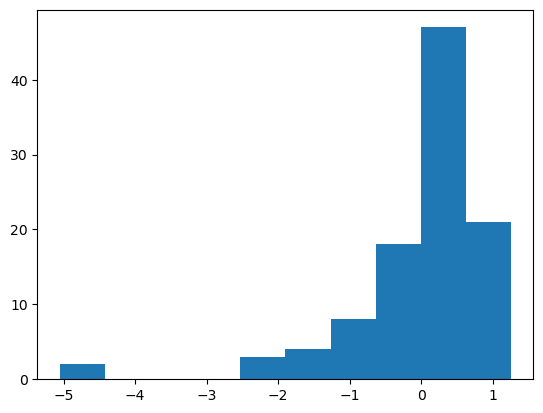

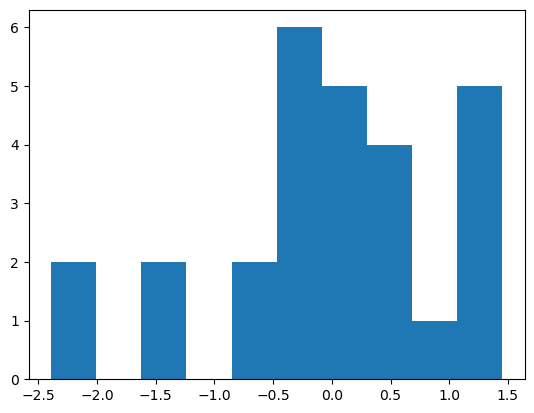

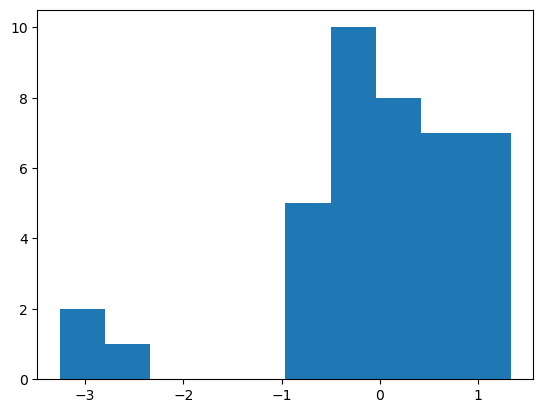

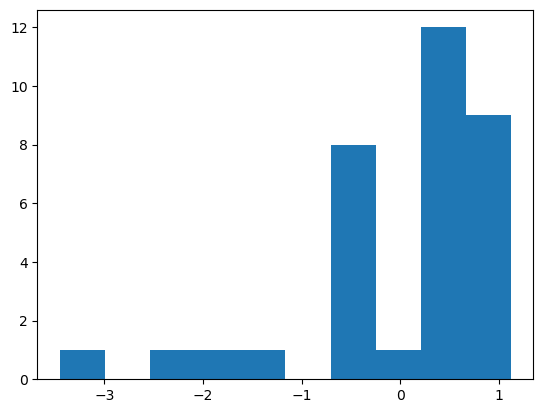

In [72]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
accuracy,reaction_time,_,_,task_labels = load_scan_behaviour(try_df['Sub_ID'],['scap'],try_df['diagnosis'].values)
hc_acc = np.mean(np.mean(accuracy['scap']['CONTROL'],axis=0),axis=0)
sz_acc = np.mean(np.mean(accuracy['scap']['SCZ'],axis=0),axis=0)
bplr_acc = np.mean(np.mean(accuracy['scap']['BIPOLAR'],axis=0),axis=0)
adhd_acc = np.mean(np.mean(accuracy['scap']['ADHD'],axis=0),axis=0)

idx = zscore(hc_acc) < -4
bad_subjs = try_df['Sub_ID'][try_df['diagnosis']=='CONTROL'][idx]
print('Poor subjs:',bad_subjs)
print('Odd HC participant scored:',hc_acc[idx]*100,'%')
print('Odd HC participant scored:',zscore(hc_acc)[idx],'(zscore)')

#plot the histograms
plt.hist(zscore(hc_acc))
plt.show()
plt.hist(zscore(sz_acc))
plt.show()
plt.hist(zscore(bplr_acc))
plt.show()
plt.hist(zscore(adhd_acc))
plt.show()

In [73]:
print(try_df['diagnosis'].value_counts())

diagnosis
CONTROL    103
BIPOLAR     40
ADHD        34
SCZ         27
Name: count, dtype: int64


In [74]:
print(bad_subjs)

52    sub-10680
65    sub-10788
Name: Sub_ID, dtype: object


In [11]:
print(try_df.loc[67])

Sub_ID                 sub-10855
diagnosis                CONTROL
reason                       NaN
Hearne base            sub-10855
Hearne site control    sub-10855
Notes                        NaN
mean_FD                 0.108655
age                           47
sex                            1
site                           1
edu_years                     14
wais_mr                       10
wais_lns                      15
wais_voc                      34
Name: 67, dtype: object


In [120]:
print(exclude_final['diagnosis'].value_counts())
print(exclude_final.groupby(['diagnosis'])[labels].mean())

diagnosis
CONTROL    103
BIPOLAR     40
ADHD        34
SCZ         27
Name: count, dtype: int64
                 age       sex      site   mean_FD  edu_years    wais_mr  \
diagnosis                                                                  
ADHD       32.529412  0.529412  0.500000  0.111921  14.617647  20.323529   
BIPOLAR    34.600000  0.525000  0.475000  0.180193  14.500000  19.325000   
CONTROL    31.388350  0.495146  0.815534  0.134289  15.155340  20.669903   
SCZ        36.185185  0.740741  0.370370  0.186985  12.666667  14.037037   

            wais_lns   wais_voc  
diagnosis                        
ADHD       19.941176  42.470588  
BIPOLAR    19.700000  42.800000  
CONTROL    21.135922  43.883495  
SCZ        17.851852  29.851852  


In [121]:
# # drop the subject
# uncomment to drop subjs
#try_df = try_df.drop(bad_subjs.index)

# print average demos
labels = ['age','sex','site','mean_FD','edu_years','wais_mr','wais_lns','wais_voc']
print(try_df['diagnosis'].value_counts())
print(try_df.groupby(['diagnosis'])[labels].mean())


diagnosis
CONTROL    101
BIPOLAR     40
ADHD        34
SCZ         27
Name: count, dtype: int64
                 age       sex      site   mean_FD  edu_years    wais_mr  \
diagnosis                                                                  
ADHD       32.529412  0.529412  0.500000  0.111921  14.617647  20.323529   
BIPOLAR    34.600000  0.525000  0.475000  0.180193  14.500000  19.325000   
CONTROL    31.445545  0.504950  0.811881  0.133657  15.118812  20.663366   
SCZ        36.185185  0.740741  0.370370  0.186985  12.666667  14.037037   

            wais_lns   wais_voc  
diagnosis                        
ADHD       19.941176  42.470588  
BIPOLAR    19.700000  42.800000  
CONTROL    21.118812  43.792079  
SCZ        17.851852  29.851852  


In [118]:
#third dropping, bad accuracy in scap
labels = ['age','sex','site','mean_FD','edu_years','wais_mr','wais_lns','wais_voc']
thirddropping__results = all_groups_stats(try_df, labels=labels)
print(thirddropping__results)

            Comparison        Var      Test       p-value  Effect size
0       CONTROL vs SCZ        age    t-test  1.992428e-02        0.536
1   CONTROL vs BIPOLAR        age    t-test  6.284477e-02        0.357
2      CONTROL vs ADHD        age    t-test  5.859370e-01        0.118
3       SCZ vs BIPOLAR        age    t-test  4.847393e-01        0.176
4          SCZ vs ADHD        age    t-test  1.474822e-01        0.373
5      BIPOLAR vs ADHD        age    t-test  3.656291e-01        0.215
6       CONTROL vs SCZ        sex  X^2 test  4.862647e-02        0.174
7   CONTROL vs BIPOLAR        sex  X^2 test  9.777975e-01        0.002
8      CONTROL vs ADHD        sex  X^2 test  9.613345e-01        0.004
9       SCZ vs BIPOLAR        sex  X^2 test  1.280309e-01        0.186
10         SCZ vs ADHD        sex  X^2 test  1.539763e-01        0.183
11     BIPOLAR vs ADHD        sex  X^2 test  8.448270e-01        0.023
12      CONTROL vs SCZ       site  X^2 test  1.773700e-05        0.379
13  CO

In [122]:
#grouped_counts = try_df.groupby(['diagnosis', 'site'])['Sub_ID'].count()
#print('0=Site0,1=Site1')
grouped_counts = try_df.groupby(['diagnosis', 'sex'])['Sub_ID'].count()
print('0=F,1=M')
print(grouped_counts)

0=F,1=M
diagnosis  sex
ADHD       0      16
           1      18
BIPOLAR    0      19
           1      21
CONTROL    0      50
           1      51
SCZ        0       7
           1      20
Name: Sub_ID, dtype: int64


Group by site (0 vs 1) and perform stats

In [83]:
try_df0 = try_df[try_df['site'] == 0]
try_df1 = try_df[try_df['site'] == 1]

try_df0_grouped = try_df0.groupby(['diagnosis'])[labels].mean()
try_df1_grouped = try_df1.groupby(['diagnosis'])[labels].mean()
print(try_df0)
print(try_df1)

        Sub_ID diagnosis  reason Hearne base Hearne site control Notes  \
84   sub-11061   CONTROL     NaN   sub-11061           sub-11061   NaN   
85   sub-11062   CONTROL     NaN   sub-11062           sub-11062   NaN   
86   sub-11066   CONTROL     NaN   sub-11066           sub-11066   NaN   
87   sub-11067   CONTROL     NaN         NaN                 NaN   NaN   
88   sub-11068   CONTROL     NaN   sub-11068           sub-11068   NaN   
..         ...       ...     ...         ...                 ...   ...   
199  sub-70079      ADHD     NaN   sub-70079           sub-70079   NaN   
200  sub-70080      ADHD     NaN   sub-70080           sub-70080   NaN   
201  sub-70081      ADHD     NaN   sub-70081           sub-70081   NaN   
202  sub-70083      ADHD     NaN   sub-70083           sub-70083   NaN   
203  sub-70086      ADHD     NaN   sub-70086           sub-70086   NaN   

      mean_FD  age  sex  site  edu_years  wais_mr  wais_lns  wais_voc  
84   0.228207   45    0     0         1

In [84]:
print(try_df0['diagnosis'].value_counts())

diagnosis
BIPOLAR    21
CONTROL    19
SCZ        17
ADHD       17
Name: count, dtype: int64


In [127]:
labels = ['age','sex','site','mean_FD','edu_years','wais_mr','wais_lns','wais_voc']
print(try_df1['diagnosis'].value_counts())
print(try_df1.groupby(['diagnosis'])[labels].mean())

diagnosis
CONTROL    82
BIPOLAR    19
ADHD       17
SCZ        10
Name: count, dtype: int64
                 age       sex  site   mean_FD  edu_years    wais_mr  \
diagnosis                                                              
ADHD       32.235294  0.352941   1.0  0.103791  14.470588  20.529412   
BIPOLAR    34.000000  0.368421   1.0  0.184727  14.894737  19.000000   
CONTROL    31.621951  0.524390   1.0  0.135991  15.146341  20.670732   
SCZ        37.900000  0.600000   1.0  0.145106  13.400000  15.300000   

            wais_lns   wais_voc  
diagnosis                        
ADHD       20.058824  41.411765  
BIPOLAR    20.210526  44.842105  
CONTROL    21.146341  43.890244  
SCZ        18.500000  31.500000  


In [85]:
grouped_counts = try_df0.groupby(['diagnosis', 'sex'])['Sub_ID'].count()
print('0=F,1=M')
print(grouped_counts)

0=F,1=M
diagnosis  sex
ADHD       0       5
           1      12
BIPOLAR    0       7
           1      14
CONTROL    0      11
           1       8
SCZ        0       3
           1      14
Name: Sub_ID, dtype: int64


In [86]:
grouped_counts = try_df1.groupby(['diagnosis', 'sex'])['Sub_ID'].count()
print('0=F,1=M')
print(grouped_counts)

0=F,1=M
diagnosis  sex
ADHD       0      11
           1       6
BIPOLAR    0      12
           1       7
CONTROL    0      39
           1      43
SCZ        0       4
           1       6
Name: Sub_ID, dtype: int64


In [114]:
labels_site = ['age','sex','edu_years', 'mean_FD', 'wais_mr','wais_lns','wais_voc']
site0_test = all_groups_stats(try_df0, labels=labels_site)
print(site0_test)

            Comparison        Var      Test   p-value  Effect size
0       CONTROL vs SCZ        age    t-test  0.126611        0.519
1   CONTROL vs BIPOLAR        age    t-test  0.116856        0.511
2      CONTROL vs ADHD        age    t-test  0.534030        0.212
3       SCZ vs BIPOLAR        age    t-test  0.989985        0.004
4          SCZ vs ADHD        age    t-test  0.482427        0.244
5      BIPOLAR vs ADHD        age    t-test  0.478050        0.242
6       CONTROL vs SCZ        sex  X^2 test  0.033126        0.355
7   CONTROL vs BIPOLAR        sex  X^2 test  0.214586        0.196
8      CONTROL vs ADHD        sex  X^2 test  0.167266        0.230
9       SCZ vs BIPOLAR        sex  X^2 test  0.470659        0.117
10         SCZ vs ADHD        sex  X^2 test  0.685989        0.069
11     BIPOLAR vs ADHD        sex  X^2 test  0.926418        0.015
12      CONTROL vs SCZ  edu_years    t-test  0.000014        1.689
13  CONTROL vs BIPOLAR  edu_years    t-test  0.111222        0

/home/gabridele/miniconda3/envs/neuroimg/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/gabridele/miniconda3/envs/neuroimg/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/gabridele/miniconda3/envs/neuroimg/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/gabridele/miniconda3/envs/neuroimg/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/gabridele/miniconda3/envs/neuroimg/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


In [113]:
labels_site = ['age','sex','edu_years', 'mean_FD', 'wais_mr','wais_lns','wais_voc']
site1_test = all_groups_stats(try_df1, labels=labels_site)
print(site1_test)

            Comparison        Var      Test   p-value  Effect size
0       CONTROL vs SCZ        age    t-test  0.108307        0.700
1   CONTROL vs BIPOLAR        age    t-test  0.344646        0.265
2      CONTROL vs ADHD        age    t-test  0.815619        0.069
3       SCZ vs BIPOLAR        age    t-test  0.357753        0.381
4          SCZ vs ADHD        age    t-test  0.194919        0.550
5      BIPOLAR vs ADHD        age    t-test  0.597912        0.178
6       CONTROL vs SCZ        sex  X^2 test  0.907054        0.012
7   CONTROL vs BIPOLAR        sex  X^2 test  0.331750        0.097
8      CONTROL vs ADHD        sex  X^2 test  0.307603        0.103
9       SCZ vs BIPOLAR        sex  X^2 test  0.424220        0.148
10         SCZ vs ADHD        sex  X^2 test  0.397231        0.163
11     BIPOLAR vs ADHD        sex  X^2 test  0.801821        0.042
12      CONTROL vs SCZ  edu_years    t-test  0.015547        1.034
13  CONTROL vs BIPOLAR  edu_years    t-test  0.634736        0

/home/gabridele/miniconda3/envs/neuroimg/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/gabridele/miniconda3/envs/neuroimg/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/gabridele/miniconda3/envs/neuroimg/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/gabridele/miniconda3/envs/neuroimg/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/gabridele/miniconda3/envs/neuroimg/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


In [119]:
with pd.ExcelWriter('/home/gabridele/Desktop/preproc_psych/allstats-tests.xlsx') as writer:
    seconddropping__results.to_excel(writer, sheet_name='seconddropping__results', index=False)
    thirddropping__results.to_excel(writer, sheet_name='thirddropping__results', index=False)
    site0_test.to_excel(writer, sheet_name='site0_test', index=False)
    site1_test.to_excel(writer, sheet_name='site1_test', index=False)